#EDA PERSONALITY DATASET

##Introduction

In this notebook, we will perform an exploratory data analysis (EDA) on the Extrovert vs. Introvert Personality Traits dataset, followed by the construction of preprocessing pipelines for the numerical and categorical features.

The dataset contains information about various behavioral and social attributes of individuals, providing insight into their personality traits, specifically whether they are extroverted or introverted. The goal is to predict an individual's personality type based on the available information, making this a binary classification problem. The dataset comes from Kaggle: https://www.kaggle.com/datasets/rakeshkapilavai/extrovert-vs-introvert-behavior-data

We first begin by importing the necessary libraries and the dataset.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer

In [9]:
data = pd.read_csv('../data/personality_dataset.csv')
data

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert
...,...,...,...,...,...,...,...,...
2895,3.0,No,7.0,6.0,No,6.0,6.0,Extrovert
2896,3.0,No,8.0,3.0,No,14.0,9.0,Extrovert
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.0,Introvert
2898,11.0,Yes,1.0,NaN,Yes,2.0,0.0,Introvert


## Basic information

We use the .info() method to get an overview of the dataset, including the number of non-null entries and data types for each column.

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


We also use the .describe() method to get summary statistics for the numerical columns in the dataset. For easier readability, we transposed the output.

In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time_spent_Alone,2837.0,4.505816,3.479192,0.0,2.0,4.0,8.0,11.0
Social_event_attendance,2838.0,3.963354,2.903827,0.0,2.0,3.0,6.0,10.0
Going_outside,2834.0,3.000000,2.247327,0.0,1.0,3.0,5.0,7.0
Friends_circle_size,2823.0,6.268863,4.289693,0.0,3.0,5.0,10.0,15.0
Post_frequency,2835.0,3.564727,2.926582,0.0,1.0,3.0,6.0,10.0


In total we have 8 columns:

    - Time_spent_Alone: Hours spent alone daily (0-11).
    - Stage_fear: Presence of stage fright (Yes/No).
    - Social_event_attendance: Frequency of social events (0-10).
    - Going_outside: Frequency of going outside (0-7).
    - Drained_after_socializing: Feeling drained after socializing (Yes/No).
    - Friends_circle_size: Number of close friends (0-15).
    - Post_frequency: Social media post frequency (0-10).
    - Personality: Target variable (Extrovert/Introvert).*

In our analysis, we will not ignore any columns and use them all, as they are are all relevant and provide useful information for predicting the person's personality.

#Visualization of numerical features

Let's proceed with visualizing the distributions of the numerical features in the dataset.

To visualize the ditributions, we will use the seaborn library to create histograms with kernel density estimates (KDE) for each numerical column.

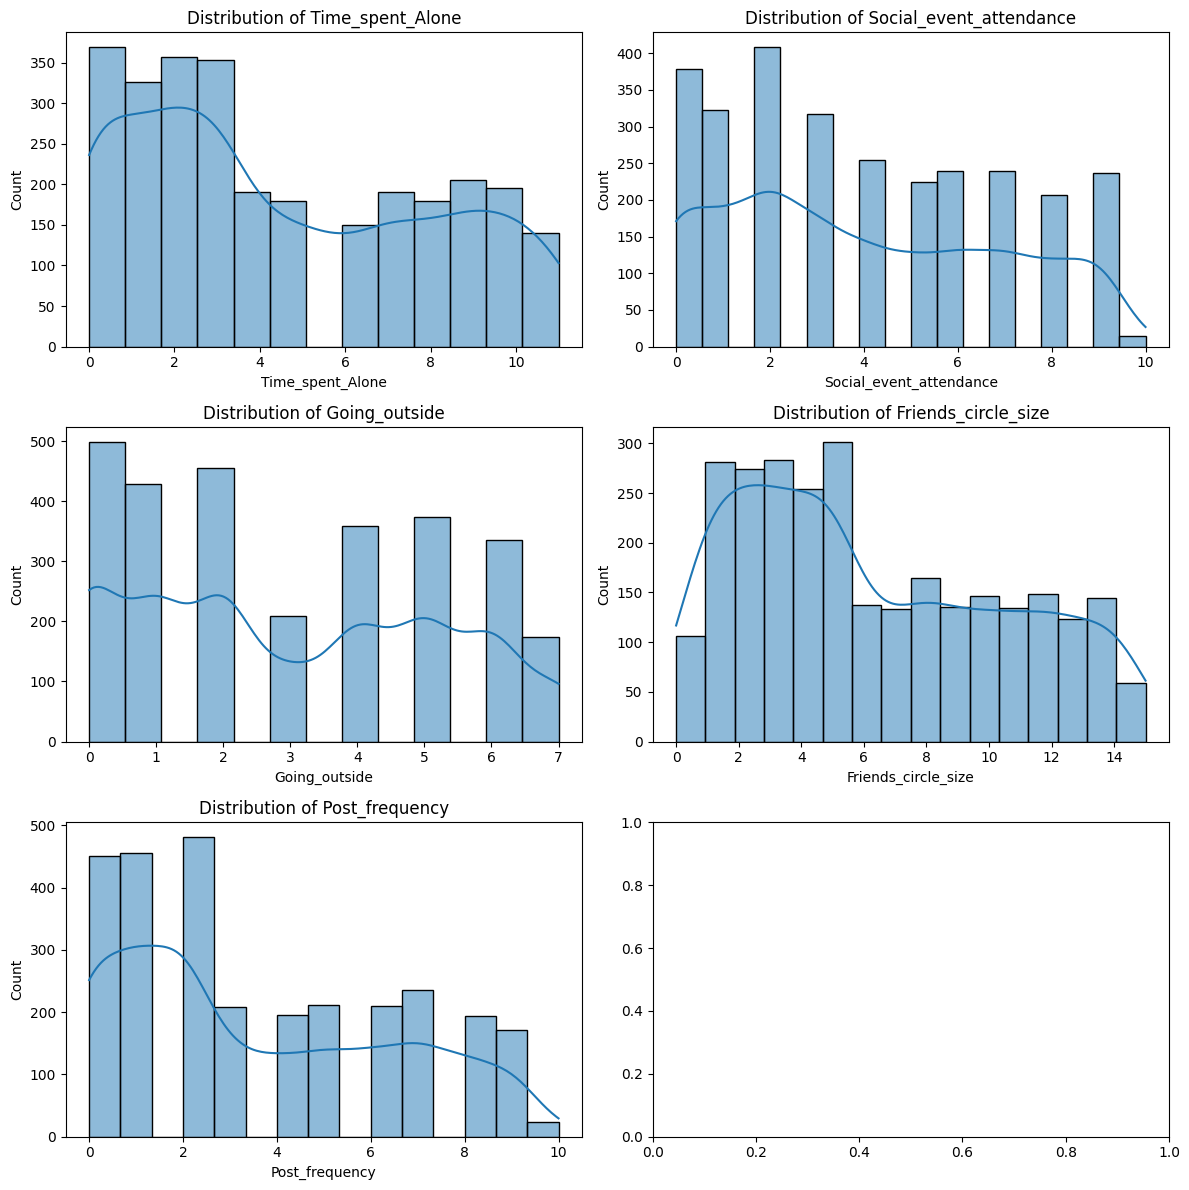

In [21]:
numerical_cols = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']

fig, axs = plt.subplots(3, 2, figsize=(12, 12))

for ax, col in zip(axs.ravel(), numerical_cols):
    sns.histplot(data[col], kde=True, ax=ax)
    ax.set_title(f'Distribution of {col}')

fig.tight_layout()

As can be observed, the distributions of the numerical features vary slightly. Each feature exhibits a clear bimodal distribution, although the relative heights of the two peaks differ. In all cases, the left peak is noticeably taller than the right, suggesting that individuals tend to cluster toward more pronounced introverted or extroverted traits, with fewer observations in intermediate ranges.

It is also important to note that some features span significantly different value ranges, which will be addressed during the preprocessing stage.

Scaling techniques will be applied to the numerical features to ensure they are on a comparable scale. However, a power transformation is not required, as none of the distributions exhibit long tails or isolated extreme values; instead, they remain relatively compact.

##Visualization of categorical features

We will now visualize the distributions of the categorical features in the dataset using countplots.

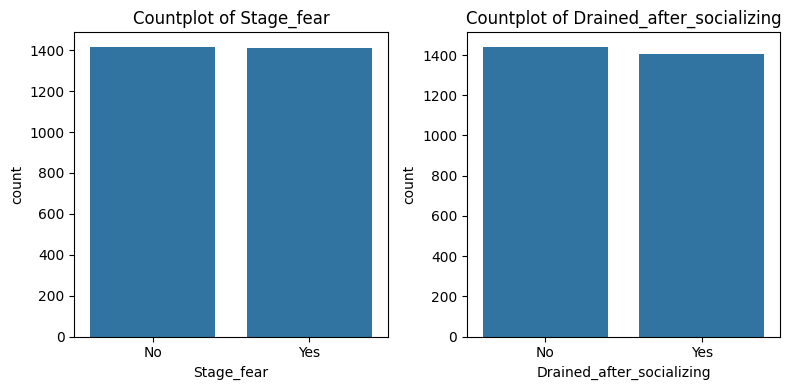

In [22]:
categorical_cols = ['Stage_fear', 'Drained_after_socializing']

fig, axs = plt.subplots(1, 2, figsize=(8, 4))

for ax, col in zip(axs.ravel(), categorical_cols):
    sns.countplot(data=data, x=col, ax=ax)
    ax.set_title(f'Countplot of {col}')

fig.tight_layout()

We can see that the dataset has an almost equal number of people with and without stage fear, as well as those who do and do not feel drained after social interactions. There is a slightly larger number of people who do not experience these traits, but the difference is almost negligible nonetheless.

For preprocessing categorical features, we will use one-hot encoding to convert the categorical variables into a format that can be provided to machine learning algorithms to improve predictions. This will be applied to both the Stage_fear and Drained_after_socializing columns, which are represented as object values.

##Target label distribution

Finally, let's visualize the distribution of the target label, Personality, to understand the class balance in the dataset.

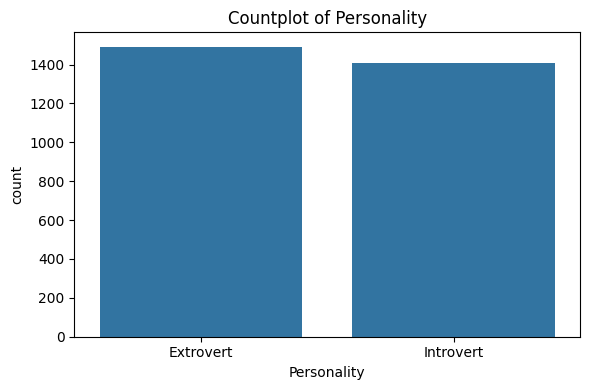

In [23]:
fig = plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Personality')
plt.title('Countplot of Personality')
plt.tight_layout()

We can also compare the personality counts between the rest of the features. For example, with numerical features, we can create boxplots to visualize the distribution of numerical features for extroverts and introverts.

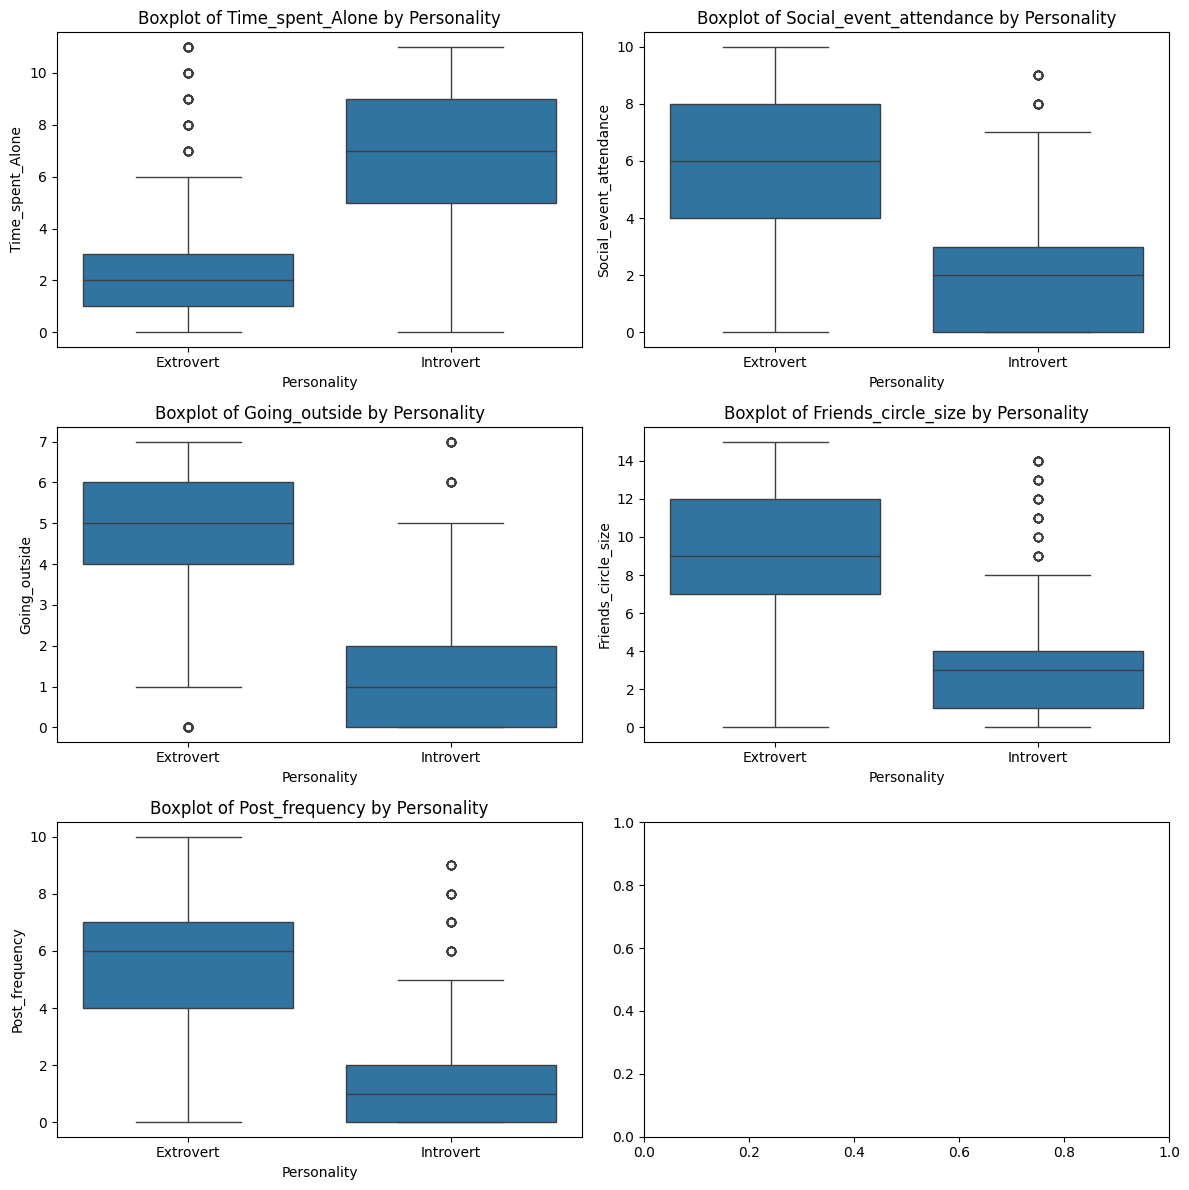

In [26]:
fig, axs = plt.subplots(3, 2, figsize=(12, 12))

for ax, col in zip(axs.ravel(), numerical_cols):
    sns.boxplot(data=data, x='Personality', y=col, ax=ax)
    ax.set_title(f'Boxplot of {col} by Personality')

fig.tight_layout()

As we can see, the majority of the distributions of numerical features between extroverts and introverts are similar, apart from Time_spent_alone, where higher values tend to be associated with more introverted individuals.

Extroverted people tend to attend a larger number of social events compared to introverted people. They also show a clear tendency to go outside more frequently, have a larger circle of friends, and post more frequently online. Introverted people appear to exhibit more traits related to isolation and privateness.

For categorical features, we can create countplots with hue set to Personality to visualize the counts of extroverts and introverts within each category.

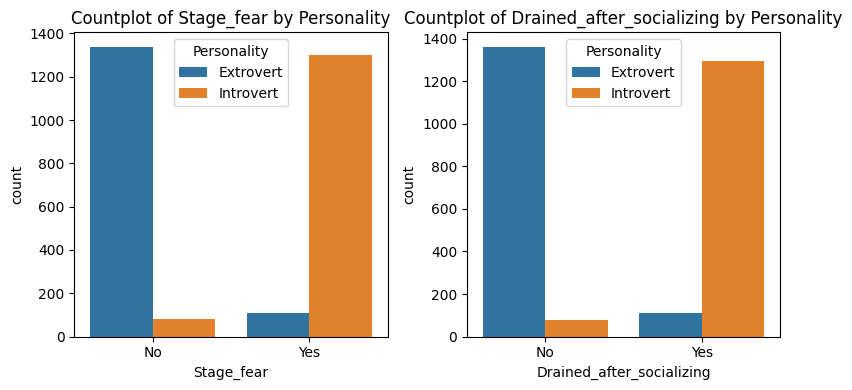

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
for ax, col in zip(axs.ravel(), categorical_cols):
    sns.countplot(data=data, x=col, hue='Personality', ax=ax)
    ax.set_title(f'Countplot of {col} by Personality')

fig.tight_layout()

The results are as expected; there is a clear group dominating each category, with extroverts being the primary group that lacks stage fear and social drain. Introverts, on the other hand, make up the majority of individuals exhibiting these social exposure traits.

We can also use a correlation matrix heatmap to visualize the correlations between all numerical columns.

This provides a mathematical measure to quantify the relationships observed in the previous visualizations.

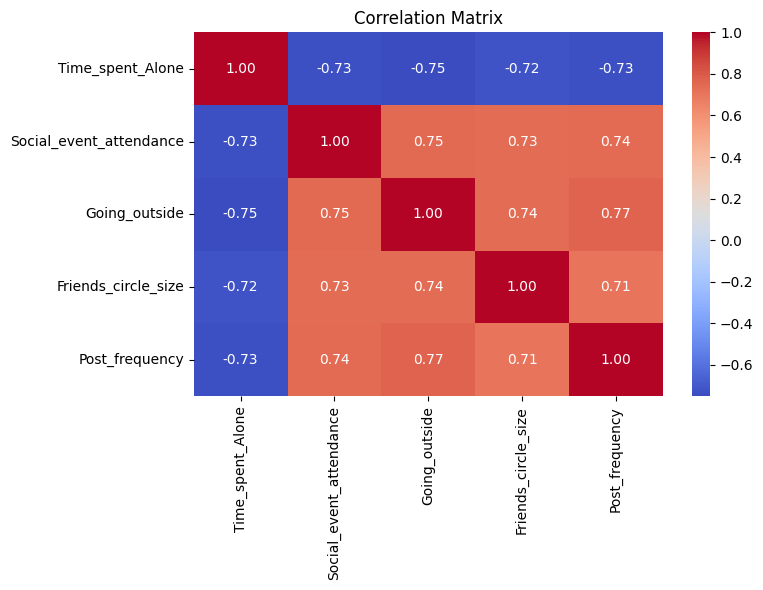

In [31]:
corr_matrix = data[['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']].corr(numeric_only=True)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()

We can observe that the majority of the features are correlated, except for Time_spent_Alone, which can be explained by the introverted nature of this feature. This contrasts with the others, as they represent extroverted traits.

##Handling mnissing values

Before building preprocessing pipelines, it is important to analyze the missing values in the dataset. We can visualize the count of missing values for each column using a bar plot.

<Axes: >

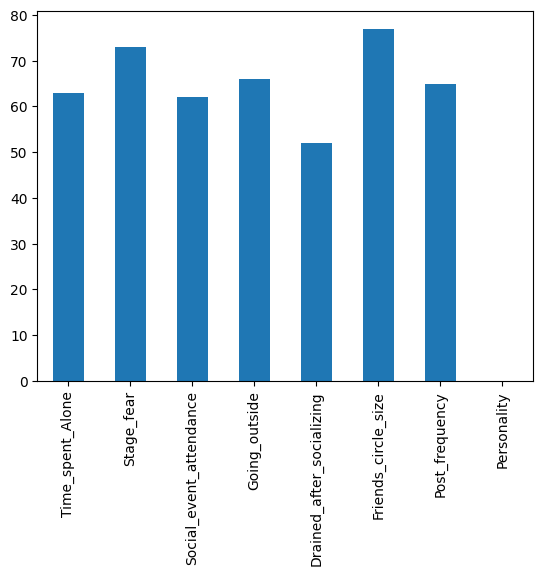

In [32]:
missing_counts = data.isnull().sum()
missing_counts.plot(kind='bar')

We can also calculate the percentage of missing values for each column to get a better understanding of the extent of missing data.

In [33]:
missing_percent = data.isnull().mean() * 100
missing_percent.sort_values(ascending=False)

,0
Friends_circle_size,2.655172
Stage_fear,2.517241
Going_outside,2.275862
Post_frequency,2.241379
Time_spent_Alone,2.172414
Social_event_attendance,2.137931
Drained_after_socializing,1.793103
Personality,0.000000


With the prior in mind, we need to choose appropriate strategies for handling missing values in our preprocessing pipelines. For numerical features, we can use the mean imputation strategy, while for categorical features, we can use the most frequent value imputation strategy.

More specifically, we will use the following strategies:

    Friends_circle_size, Going_outside, Post_frequency, Time_spent_Alone, Social_event_attendance:
      Impute missing values with the mean of the column

    Stage_fear, Drained_after_socializing:
      Impute missing values with the most frequent value in the column

It appears that all non-target features have a small percentage of missing values, which should not pose a problem, as they represent a negligible fraction and can be easily addressed using the proposed strategies.

##Preprocessing pipelines

Now that we have analyzed the dataset and decided on strategies for handling missing values, we can proceed to build preprocessing pipelines for both numerical and categorical features.

We can declaratively create a preprocessing pipeline using ColumnTransformer to apply different transformations to numerical and categorical columns. Each of these transformations can be a pipeline itself, created using make_pipeline. In particular, the transformations we will apply are:

    To the Stage_fear and Drained_after_socializing columns: Input missing values with the most frequent value, followed by one-hot encoding.
    To the Time_spent_Alone, Social_event_attendance, Going_outside, Friends_circle_size, and Post_frequency columns: Imput missing values with the mean of the column, followed by standard scaling.
    Any remaining columns will be passed through without any changes.


In [34]:
preprocessing_pipeline = make_pipeline(
    ColumnTransformer(
        transformers=[
            ('cat', make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder()), ['Stage_fear', 'Drained_after_socializing']),
            ('num', make_pipeline(SimpleImputer(strategy='mean'), StandardScaler()), ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']),
        ],
        remainder='passthrough',
    )
)

Now we need to define our feature matrix x and target vector y, followed by splitting the dataset into training and testing sets. We will use an 80-20 split, with stratification based on the target variable to ensure that both sets have a similar distribution of the target classes.

In [36]:
x = data[numerical_cols + categorical_cols]
y = data['Personality']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

We can verify the class distribution in both the training and testing sets to ensure that stratification worked as intended.

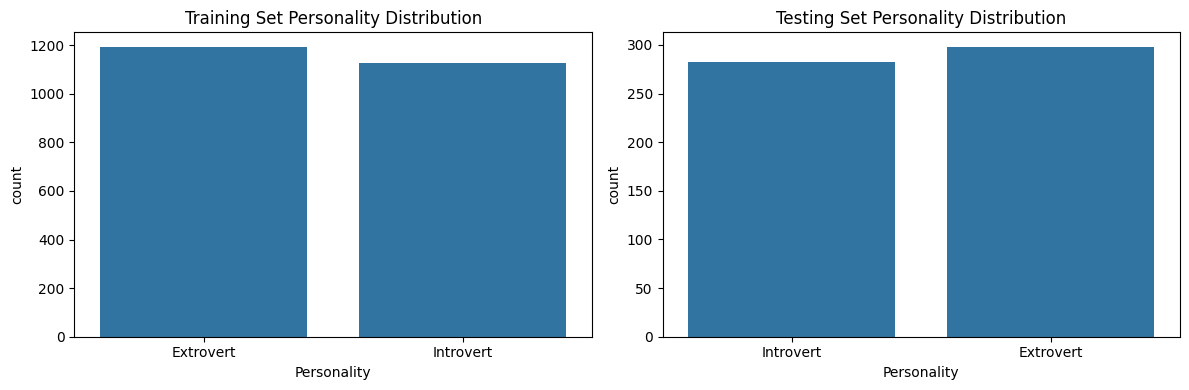

In [37]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
sns.countplot(x=y_train, ax=axs[0])
axs[0].set_title('Training Set Personality Distribution')
sns.countplot(x=y_test, ax=axs[1])
axs[1].set_title('Testing Set Personality Distribution')
fig.tight_layout()

To apply the preprocessing pipeline, we can use the fit_transform method on the training data to fit the pipeline and transform the data in one step. For the testing data, we will use the transform method to apply the same transformations learned from the training data.

In [38]:
x_train_processed = preprocessing_pipeline.fit_transform(x_train, y_train)
x_train_processed

array([[ 1.        ,  0.        ,  1.        , ...,  1.79507431,
        -0.54486107,  0.84088554],
       [ 1.        ,  0.        ,  1.        , ...,  1.34461602,
        -0.07456432,  0.84088554],
       [ 1.        ,  0.        ,  1.        , ...,  1.34461602,
         1.10117756,  1.53373859],
       ...,
       [ 0.        ,  1.        ,  0.        , ..., -1.35813374,
        -1.2503062 , -1.23767363],
       [ 0.        ,  1.        ,  0.        , ..., -1.35813374,
        -0.3097127 , -0.8912471 ],
       [ 0.        ,  1.        ,  0.        , ..., -0.45721716,
        -0.78000945, -0.54482058]])

In [39]:
x_test_processed = preprocessing_pipeline.transform(x_test)
x_test_processed

array([[ 1.00000000e+00,  0.00000000e+00,  1.00000000e+00, ...,
         1.34461602e+00,  1.10117756e+00,  4.94459009e-01],
       [ 1.00000000e+00,  0.00000000e+00,  1.00000000e+00, ...,
         8.94157725e-01,  1.33632594e+00, -1.98394047e-01],
       [ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -4.57217156e-01, -1.25030620e+00, -5.44820575e-01],
       ...,
       [ 1.00000000e+00,  0.00000000e+00,  1.00000000e+00, ...,
         8.94157725e-01, -2.08853714e-16,  1.88016512e+00],
       [ 1.00000000e+00,  0.00000000e+00,  1.00000000e+00, ...,
         8.94157725e-01,  1.57147431e+00, -1.98394047e-01],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
        -1.35813374e+00, -1.25030620e+00, -5.44820575e-01]])

##Building a Classification Model

Now that we have our preprocessing pipeline set up, we can build a classification model using logistic regression. We will create a complete pipeline that includes both the preprocessing steps and the logistic regression model.

This is important because it ensures that the same preprocessing steps are applied to any new data before making predictions. By including the preprocessing pipeline within the model pipeline, our model will be able to handle raw input data directly.

In sklearn, we can create a new pipeline that combines the preprocessing pipeline with the logistic regression model using make_pipeline.

In [40]:
classification_model = make_pipeline(
    preprocessing_pipeline,
    LogisticRegression()
)

The classification_model object is now a complete pipeline that first preprocesses the input data and then applies logistic regression for classification. If we output the steps of the pipeline, we can see the individual components that make up the complete model.

In [41]:
classification_model

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('cat',
                                                                   Pipeline(steps=[('simpleimputer',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('onehotencoder',
                                                                                    OneHotEncoder())]),
                                                                   ['Stage_fear',
                                                                    'Drained_after_socializing']),
                                                                  ('num',
                                                                   Pipeline(steps=[('simpleimputer',
                                                                                    SimpleImputer()),
                                                                                   ('standardscaler',
                                                                                    StandardScaler())]),
                                                                   ['Time_spent_Alone',
                                                                    'Social_event_attendance',
                                                                    'Going_outside',
                                                                    'Friends_circle_size',
                                                                    'Post_frequency'])]))])),
                ('logisticregression', LogisticRegression())])

Now that the pipeline is set up, we can fit the model to the training data using the fit method. This will internally call the fit_transform method of the preprocessing pipeline on the training data, followed by fitting the logistic regression model on the transformed data.

In [42]:
classification_model.fit(x_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('cat',
                                                                   Pipeline(steps=[('simpleimputer',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('onehotencoder',
                                                                                    OneHotEncoder())]),
                                                                   ['Stage_fear',
                                                                    'Drained_after_socializing']),
                                                                  ('num',
                                                                   Pipeline(steps=[('simpleimputer',
                                                                                    SimpleImputer()),
                                                                                   ('standardscaler',
                                                                                    StandardScaler())]),
                                                                   ['Time_spent_Alone',
                                                                    'Social_event_attendance',
                                                                    'Going_outside',
                                                                    'Friends_circle_size',
                                                                    'Post_frequency'])]))])),
                ('logisticregression', LogisticRegression())])

With our trained model, we can now make predictions on the test set using the predict method. This will internally call the transform method of the preprocessing pipeline on the test data, followed by making predictions using the logistic regression model.

In [43]:
y_test_pred = classification_model.predict(x_test)
y_test_pred

array(['Extrovert', 'Extrovert', 'Extrovert', 'Extrovert', 'Extrovert',
       'Extrovert', 'Introvert', 'Introvert', 'Extrovert', 'Introvert',
       'Extrovert', 'Extrovert', 'Extrovert', 'Extrovert', 'Introvert',
       'Extrovert', 'Extrovert', 'Extrovert', 'Introvert', 'Introvert',
       'Introvert', 'Extrovert', 'Extrovert', 'Introvert', 'Introvert',
       'Introvert', 'Introvert', 'Extrovert', 'Extrovert', 'Extrovert',
       'Extrovert', 'Extrovert', 'Introvert', 'Introvert', 'Extrovert',
       'Extrovert', 'Extrovert', 'Extrovert', 'Extrovert', 'Extrovert',
       'Introvert', 'Extrovert', 'Introvert', 'Introvert', 'Introvert',
       'Introvert', 'Extrovert', 'Extrovert', 'Introvert', 'Introvert',
       'Introvert', 'Introvert', 'Extrovert', 'Introvert', 'Introvert',
       'Extrovert', 'Introvert', 'Extrovert', 'Extrovert', 'Introvert',
       'Introvert', 'Introvert', 'Introvert', 'Extrovert', 'Extrovert',
       'Introvert', 'Introvert', 'Introvert', 'Introvert', 'Extr

Finally, we can evaluate the model's performance by comparing the predicted labels with the actual labels from the test set. One simple way to do this is by creating a DataFrame that shows both the predicted and actual labels side by side for each passenger in the test set.

In [44]:
x_test['Personality_Predicted'] = y_test_pred
x_test['Personality_Actual'] = y_test.values
x_test

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Stage_fear,Drained_after_socializing,Personality_Predicted,Personality_Actual
440,0.0,6.0,6.0,11.0,5.0,No,No,Extrovert,Introvert
2692,1.0,7.0,5.0,12.0,3.0,No,No,Extrovert,Extrovert
225,6.0,0.0,2.0,1.0,2.0,NaN,Yes,Extrovert,Introvert
328,2.0,4.0,6.0,7.0,3.0,No,No,Extrovert,Extrovert
1259,3.0,4.0,6.0,7.0,8.0,No,No,Extrovert,Extrovert
...,...,...,...,...,...,...,...,...,...
410,5.0,1.0,0.0,1.0,0.0,Yes,Yes,Introvert,Introvert
1410,7.0,1.0,1.0,2.0,0.0,Yes,Yes,Introvert,Introvert
1845,1.0,6.0,5.0,NaN,9.0,No,No,Extrovert,Extrovert
2667,0.0,4.0,5.0,13.0,3.0,No,No,Extrovert,Extrovert
